# Univariate Time Series

<b>Definition</b> from <a href='https://onlinecourses.science.psu.edu/stat510/node/47'>here</a>: <i>a sequence of measurements of the same variable collected over time</i>. Examples: stock prices, demand, housing prices.

In pandas a univariate time series is a Series object where the index is a "timestamp".

## Stock prices

Our goal is to create a Series object <i>stock</i> with the Google stock closing price.

<b>Stock History info:</b> You can get the Google stock historical price data from https://finance.yahoo.com/quote/GOOGL/history?p=GOOGL
In 'Historical Data' tab, set the 'Time Period' to Max, then 'Apply', then 'Download Data'. A .csv file will be downloaded into your local computer. Rename the file to **GOOGL.csv**

In [2]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
%autosave 0

Autosave disabled


In [5]:
pwd 
# can run the linux commend line in jupyter notebook

'/Users/zhujunlan/Desktop/flora/PythonClass/Module 03 - univariate time series'

The following code creates a Series object <i>stock</i> based on GOOGL.csv file. Index is the date and the variable is the Google stock closing prices. 

In [10]:
import pandas as pd
import numpy as np
data = pd.read_csv('GOOGL.csv',index_col=0, parse_dates=True)
# #or use the following two lines
# data = pd.read_csv('GOOGL.csv',index_col=0)
# data.index=data.index.astype(np.datetime64)

In [12]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659000
2004-08-20,50.555557,54.594593,50.300301,54.209209,54.209209,22834300
2004-08-23,55.430431,56.796795,54.579578,54.754753,54.754753,18256100
2004-08-24,55.675674,55.855854,51.836838,52.487488,52.487488,15247300
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188600


### Create an univariate time series based on stock closing price

In [13]:
stock = data['Close']
# from date fram extract a series

The following command will plot the stock price

In [15]:
stock.head()

Date
2004-08-19    50.220219
2004-08-20    54.209209
2004-08-23    54.754753
2004-08-24    52.487488
2004-08-25    53.053055
Name: Close, dtype: float64

In [17]:
stock.index

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01',
               ...
               '2019-09-18', '2019-09-19', '2019-09-20', '2019-09-23',
               '2019-09-24', '2019-09-25', '2019-09-26', '2019-09-27',
               '2019-09-30', '2019-10-01'],
              dtype='datetime64[ns]', name='Date', length=3806, freq=None)

In [18]:
stock.values

array([  50.220219,   54.209209,   54.754753, ..., 1225.949951,
       1221.140015, 1206.      ])

In [19]:
stock.describe()

count    3806.000000
mean      482.181942
std       329.813532
min        50.055054
25%       236.591598
50%       314.647156
75%       719.267517
max      1296.199951
Name: Close, dtype: float64

Populating the interactive namespace from numpy and matplotlib


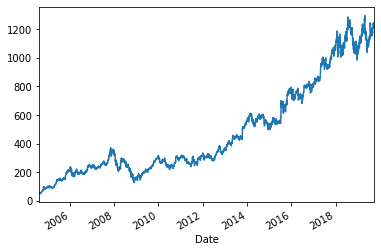

In [20]:
%pylab inline
stock.plot()

## Exploring a Time Series

This Series object has one entry for each trading day. The index (of type <i>datetime64</i>) is the day and the value (of type <i>float64</i>) is the closing price.

Let's take a look at the first 10 days of data

In [26]:
stock.head(10)

Date
2004-08-19    50.220219
2004-08-20    54.209209
2004-08-23    54.754753
2004-08-24    52.487488
2004-08-25    53.053055
2004-08-26    54.009010
2004-08-27    53.128128
2004-08-30    51.056057
2004-08-31    51.236237
2004-09-01    50.175175
Name: Close, dtype: float64

Let's take a look at the last 10 days of data

In [27]:
stock.tail(10)

Date
2019-09-18    1232.650024
2019-09-19    1238.750000
2019-09-20    1229.839966
2019-09-23    1234.689941
2019-09-24    1218.329956
2019-09-25    1245.939941
2019-09-26    1242.290039
2019-09-27    1225.949951
2019-09-30    1221.140015
2019-10-01    1206.000000
Name: Close, dtype: float64

## Questions

Answer these questions without using for loops.

<b>Question 1</b><br/>What day had the largest stock price and what's the price? 

In [29]:
stock.nlargest(1)

Date
2019-04-29    1296.199951
Name: Close, dtype: float64

<b>Question 2</b><br/>What are the 10 days with largest stock price? Report both the day and the price.

In [30]:
stock.nlargest(10)

Date
2019-04-29    1296.199951
2018-07-26    1285.500000
2019-04-26    1277.420044
2018-07-25    1275.939941
2019-04-23    1270.589966
2019-04-25    1267.339966
2018-08-29    1264.650024
2018-08-09    1264.459961
2018-08-08    1261.329956
2019-04-24    1260.050049
Name: Close, dtype: float64

<b>Question 3</b><br/>How much profit (ratio) would we have made if we had bought at the beginning and sold everything on the last day? Do not type in any date.

In [33]:
(stock.values[-1] - stock.values[0]) / stock.values[0]

23.014232196000577

<b>Question 4</b><br/>
What is the moving average of the price at each trading session? Use a 50-trading-days window. <i>Hint</i>: Explore the method <i>rolling</i>

In [36]:
roll = stock.rolling(50)

In [37]:
stock[:50].mean()
# 前50个数的mean !!

63.58698695999998

Set maximum display row to 100

In [40]:
pd.set_option('display.max_row', 100)

In [62]:
roll.mean().head()
# 因为设置了50的rolling，所以到第50个值才有值

Date
2004-08-19   NaN
2004-08-20   NaN
2004-08-23   NaN
2004-08-24   NaN
2004-08-25   NaN
Name: Close, dtype: float64

<b>Question 5</b><br/>
Consider this investment strategy: buy on day x and then sell after 5 days (on day x+5). Find the expected profit (in %) of this operation. <i>Hint</i>: explore the method <i>shift</i>

In [42]:
stock.head()

Date
2004-08-19    50.220219
2004-08-20    54.209209
2004-08-23    54.754753
2004-08-24    52.487488
2004-08-25    53.053055
Name: Close, dtype: float64

In [43]:
stock.shift(-1).head()
# 把未来一天的值放现在的值
# 这样做可以今天买 明天出 stock 来计算赚的钱，而不用重新load数值

Date
2004-08-19    54.209209
2004-08-20    54.754753
2004-08-23    52.487488
2004-08-24    53.053055
2004-08-25    54.009010
Name: Close, dtype: float64

In [44]:
stock.head(6)

Date
2004-08-19    50.220219
2004-08-20    54.209209
2004-08-23    54.754753
2004-08-24    52.487488
2004-08-25    53.053055
2004-08-26    54.009010
Name: Close, dtype: float64

In [45]:
stock.shift(-5).head()

Date
2004-08-19    54.009010
2004-08-20    53.128128
2004-08-23    51.056057
2004-08-24    51.236237
2004-08-25    50.175175
Name: Close, dtype: float64

In [47]:
future_price = stock.shift(-5)

In [50]:
profit = (future_price - stock) / stock

# 每天都买卖？？？？

In [51]:
profit.head()

Date
2004-08-19    0.075444
2004-08-20   -0.019943
2004-08-23   -0.067550
2004-08-24   -0.023839
2004-08-25   -0.054245
Name: Close, dtype: float64

In [53]:
profit.mean() * 100

# invest 1M in day1

0.5037584846157643

1917.304792447599

So what exactly this profit average means ?  Assuming invest $100 on day 1. 

In [55]:
100 * profit.mean() * len(stock)

# 最后赚的钱

1917.304792447599

<b>Question 6</b><br/>
Consider this investment strategy: buy whenever the price goes above the 20-day moving average, and then sell after 5 trading sessions. How much profit (in %) would we make on average?

In [57]:
movavg = stock.rolling(20).mean()

In [ ]:
stock > movavg

#不是每天都excutite，只有满足条件才

In [58]:
profit = (future_price - stock) / stock


In [63]:
profit[stock > movavg].head()

# 为什么有负数？？

Date
2004-09-16    0.060104
2004-09-17    0.019917
2004-09-20   -0.009216
2004-09-21    0.076544
2004-09-22    0.107282
Name: Close, dtype: float64

With the same $100.00 to start with, we get the profit ...

In [61]:
100 * profit[stock > movavg].mean() * len(profit[stock > movavg])

# 这个strategy没有上面那个赚钱多

1196.3123039749482

## Median prices of single family homes in zip code 95050

The file <i>santaclara_sfh.csv</i> was downloaded from <a href= 'http://redfin.com'>redfin.com</a>. For each end of month day, this file reports the median price of a single family home (sfh) in zip code 95050 over the previous 3 months. The data starts from 2012-01-31 and ends on recent month.

The following code loads and cleans the data set <i>santaclara_sfh.csv</i>, which you should copy into the same folder as this Jupyter notebook. For the moment, do not worry about understanding the code.

In [64]:
# don't worry about understanding this code
df = pd.read_csv('santaclara_sfh.csv')
# make the date column of type datetime
df['date'] = pd.to_datetime(df.date)
# make the price column of type float
df['median_sfh_price_past_3_months'] = \
    df.median_sfh_price_past_3_months + 0.0 
# make date the index 
df.set_index('date',inplace=True) 
# take the series of median prices
housing = df['median_sfh_price_past_3_months']
housing.name = 'housing'

Let's take a look at the oldest prices

In [65]:
housing.head()

date
2012-01-31    485000.0
2012-02-29    528000.0
2012-03-31    568000.0
2012-04-30    620000.0
2012-05-31    630000.0
Name: housing, dtype: float64

Remember that each price is the median over the previous three months. So, for example, the median sale price in the period from 2012-02-01 to 2012-04-30 was $620,000. Let's plot it.

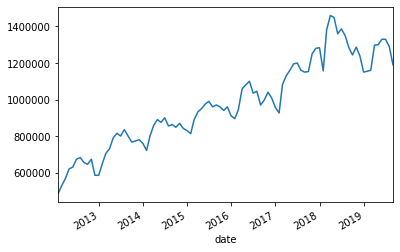

In [66]:
housing.plot()

## Are housing prices correlated to stock prices?

<p>To anwer this question, we first need to align the two Series. The Series <i>housing</i> has one entry for each ending day of each month and a value that is the 3-month moving average; the series <i>stock</i> has one entry for each <b>trading day</b> and the value that is the closing price. </p>
<p>To align the two Series, we will create a new Series of stock prices that has only one entry for every month-end-day and reports the 3-month moving median price of the stock</p>

<p>We will do the following:
<ol>
<li>Pad <i>stock</i> so that there are no missing days (currently, holidays are missing)
<li>Compute the 3-month moving median of <i>stock</i>
<li>Retain only the end-of-month days in <i>stock</i>
</ol>
</p>


#### Step #1: Pad stock so that there are no missing days (currently, holidays are missing)

In [77]:
# pad指将数据调成相似的格式 可以分析的格式
paded = stock.asfreq(freq='1D',method='ffill')

#ffill - forward fill 将之前的数值赋值到前面


#### Step #2: Compute the 90-day moving median of stock

In [71]:
movmed = paded.rolling(90).median()

In [72]:
movmed[88:95]

Date
2004-11-15          NaN
2004-11-16    66.356354
2004-11-17    66.976975
2004-11-18    67.647648
2004-11-19    68.153156
2004-11-20    68.688690
2004-11-21    68.851353
Freq: D, Name: Close, dtype: float64

#### Step #3: Retain the same days as in the housing Series

In [73]:
housing.head()

date
2012-01-31    485000.0
2012-02-29    528000.0
2012-03-31    568000.0
2012-04-30    620000.0
2012-05-31    630000.0
Name: housing, dtype: float64

In [75]:
stock.head()

Date
2004-08-19    50.220219
2004-08-20    54.209209
2004-08-23    54.754753
2004-08-24    52.487488
2004-08-25    53.053055
Name: Close, dtype: float64

In [78]:
mod_stock = movmed[housing.index]

### Compute correlation

Are stock and housing prices correlated?

In [79]:
housing.corr(mod_stock)

0.9493796927231622

Uh... yes, they are strongly correlated

Let's plot them

In [5]:
import matplotlib.pyplot as plt

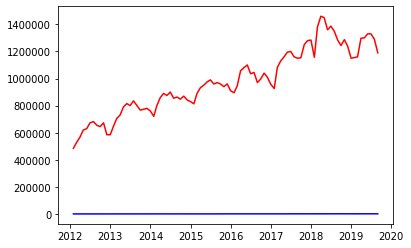

In [80]:
plt.plot(mod_stock,'b')
plt.plot(housing,'r')
plt.show()

#因为不同的scale
# each series divided by the first value of that seires


mmm... the problem is that the two scales are very different: housing is about 1M dollars while the stock price is in the order of hundreds of dollars. 

Let's normalize them so that the value on the first day (2012-01-31) is 1 for both series.

In [85]:
normalized_housing = mod_stock/mod_stock[0]

Plot the normalized data again

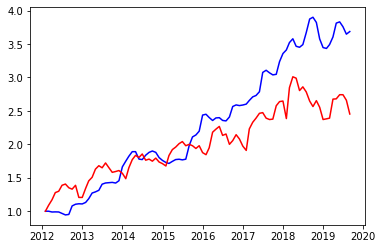

In [84]:
plt.plot(mod_stock/mod_stock[0],'b')
plt.plot(housing/housing[0],'r')
plt.show()

Assign proper legends for different lines

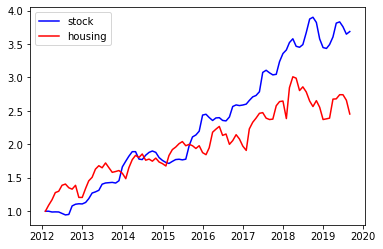

In [86]:
plt.plot(mod_stock/mod_stock[0],'b')
plt.plot(housing/housing[0],'r')
plt.legend(['stock','housing'])
plt.show()